# TELECO CUSTOMER CHURN DATASET:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df)

df.head()
df.info()
df.describe()


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)



In [23]:
print("Shape of DataFrame:", df.shape)
print("Any NaNs?", df.isnull().sum().sum())
print("Preview of DataFrame:")
print(df.head())


Shape of DataFrame: (0, 31)
Any NaNs? 0
Preview of DataFrame:
Empty DataFrame
Columns: [SeniorCitizen, tenure, MonthlyCharges, TotalCharges, Churn, gender_Male, Partner_Yes, Dependents_Yes, PhoneService_Yes, MultipleLines_No phone service, MultipleLines_Yes, InternetService_Fiber optic, InternetService_No, OnlineSecurity_No internet service, OnlineSecurity_Yes, OnlineBackup_No internet service, OnlineBackup_Yes, DeviceProtection_No internet service, DeviceProtection_Yes, TechSupport_No internet service, TechSupport_Yes, StreamingTV_No internet service, StreamingTV_Yes, StreamingMovies_No internet service, StreamingMovies_Yes, Contract_One year, Contract_Two year, PaperlessBilling_Yes, PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 31 columns]


In [24]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df[df['TotalCharges'].notna()]

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)

print("Rows after cleaning:", df.shape[0])


Rows after cleaning: 7032


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 5625, Test size: 1407


In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.79


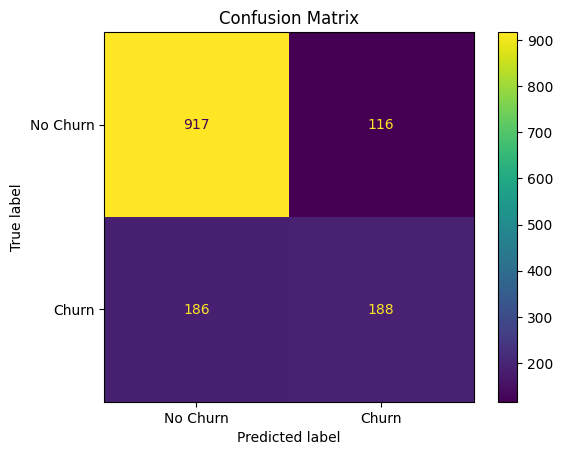

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


# Interpretation:

True Negatives (TN): Model correctly predicted customer will not churn.

False Positives (FP): Model predicted churn but customer did not churn.

False Negatives (FN): Model predicted no churn, but customer churned. (This is bad — we missed a customer about to leave.)

True Positives (TP): Model correctly predicted churn.